In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import matplotlib.cm as cm
import pandas as pd


In [2]:
def cluster_visualizations(n_clusters, ratings_dict, clusters_csv_filepath, pca_features_filepath, figure_filepath):

    ratings = pd.DataFrame.from_dict(ratings_dict, orient='index')
    ratings.reset_index(inplace=True)
    ratings.columns = ['kmeans_cluster','kmeans_rating']

    clusters = pd.read_csv(clusters_csv_filepath)
    clusters.reset_index(inplace=True)
    clusters.columns = ['index','kmeans_cluster']
    
    pca_features = pd.read_csv(pca_features_filepath)
    pca_features
    
    clusters_ratings = clusters.merge(ratings, on='kmeans_cluster', how='outer')
    clusters_ratings = clusters_ratings.sort_values('index').set_index('index')
    clusters_ratings = clusters_ratings.merge(pca_features.iloc[:,:3], left_index=True, right_index=True)
    clusters_ratings.rename(columns={'0':'pca_1', '1':'pca_2','2':'pca_3'}, inplace=True)

    colors = {'mediocre':'deepskyblue', 'good':'gold','bad':'mediumvioletred','no_response':'darkorange'}

    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_subplot()

    #can manually adjust tick and limits of axes, comment out to just go with default
    ax.set_xticks([-40,-20,0,20,40,60])
    ax.set_yticks([-40, -20,0,20,40])
    
    ax.set_xlabel('PCA Component 1')
    ax.set_ylabel('PCA Component 2')

    legend_elements = [Patch(facecolor = 'gold',label = "Good"),
                   Patch(facecolor = 'mediumvioletred',label = "Bad"),
                   Patch(facecolor = 'deepskyblue',label = "Mediocre"),
                   Patch(facecolor = 'darkorange',label = "No Response")]

    ax.scatter(clusters_ratings['pca_1'], clusters_ratings['pca_2'], s=2, c=clusters_ratings['kmeans_rating'].map(colors))

    plt.legend(handles=legend_elements)
    plt.title(f'Kmeans {n_clusters} clusters with labels - 2D')
    plt.savefig(f'{figure_filepath}/kmeans{n_clusters}_ratings_clusters_2D.png', bbox_inches='tight')
    plt.show()
    plt.close()
    
    fig = plt.figure(figsize=(7, 7), layout='constrained')
    ax = fig.add_subplot(projection='3d')

    #can manually adjust tick and limits of axes, comment out to just go with default
    ax.set_xticks([-40,-20,0,20,40,60])
    ax.set_yticks([-40, -20,0,20,40])
    ax.set_zticks([-40,-20,0,20,40])

    ax.axes.set_xlim3d(left=-39.8, right=59.8) 
    ax.axes.set_ylim3d(bottom=-39.8, top=49.8) 
    ax.axes.set_zlim3d(bottom=-39.8, top=59.8)
    
    ax.set_xlabel('PCA Component 1')
    ax.set_ylabel('PCA Component 2')
    ax.set_zlabel('PCA Component 3')
    
    ax.dist=11

    ax.scatter(clusters_ratings['pca_1'], clusters_ratings['pca_2'], 
           clusters_ratings['pca_2'],s=2, c=clusters_ratings['kmeans_rating'].map(colors))

    plt.legend(handles=legend_elements)
    plt.title(f'Kmeans {n_clusters} clusters with labels - 3D')
    plt.savefig(f'{figure_filepath}/kmeans{n_clusters}_ratings_clusters_3D.png', bbox_inches='tight')
    plt.show()


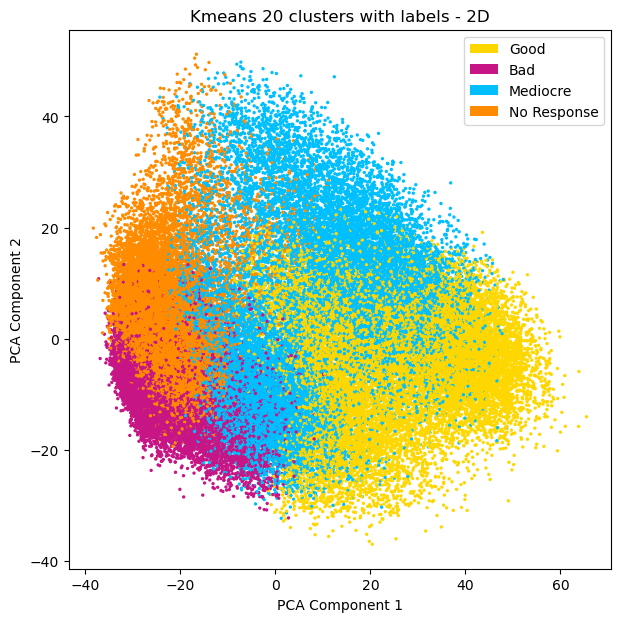

/scratch/tmp/24524573.1.default.q/ipykernel_5666/1892731100.py:60: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist=11


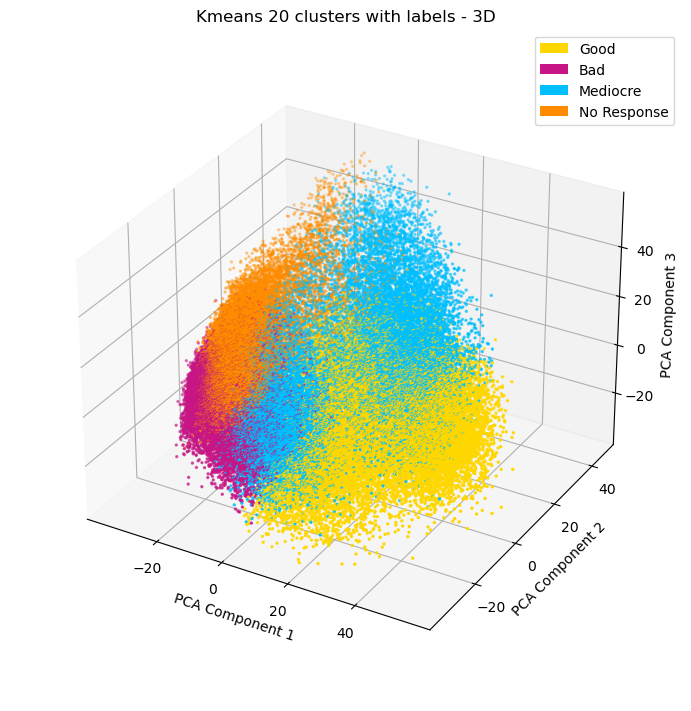

In [3]:
vgg19_kmeans20_ratings = {0:'good',1:'bad',2:'mediocre',3:'mediocre',4:'bad',5:'mediocre',6:'mediocre',7:'no_response',
                          8:'good',9:'mediocre',10:'mediocre',11:'good',12:'mediocre',13:'good',14:'bad',
                          15:'no_response',16:'no_response',17:'no_response',18:'no_response',19:'good'}

cluster_visualizations(n_clusters=20,ratings_dict=vgg19_kmeans20_ratings, 
                       clusters_csv_filepath='../model/vgg19_kmeans20.csv', 
                       pca_features_filepath='../model/vgg19_pca_features.csv', 
                       figure_filepath='../model')


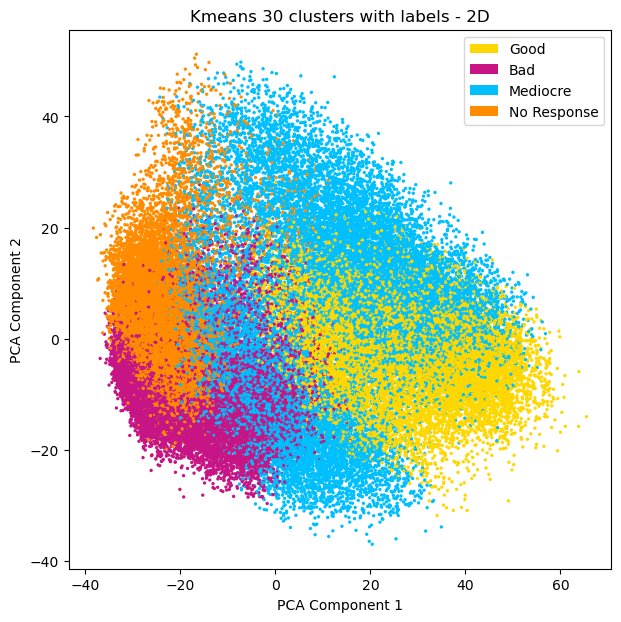

/scratch/tmp/24524573.1.default.q/ipykernel_5666/1892731100.py:60: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist=11


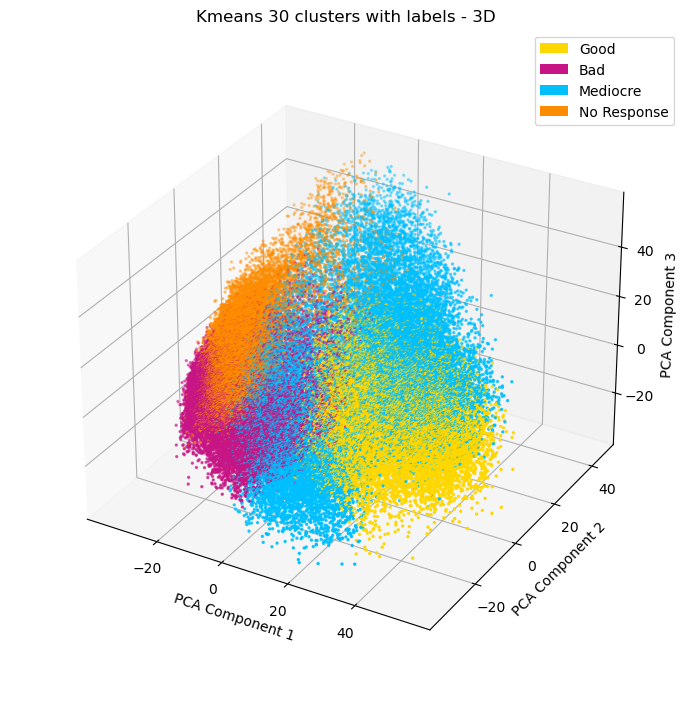

In [4]:
vgg19_kmeans30_ratings = {0:'mediocre',1:'bad',2:'no_response',3:'mediocre',4:'good',5:'mediocre',6:'no_response',7:'good',
                          8:'mediocre',9:'mediocre',10:'good',11:'mediocre',12:'mediocre',13:'good',14:'no_response',
                          15:'mediocre',16:'bad',17:'bad',18:'bad',19:'good',20:'mediocre',
                          21:'mediocre',22:'mediocre',23:'mediocre',24:'no_response',25:'bad',26:'good',27:'good',
                          28:'no_response',29:'no_response'}

cluster_visualizations(n_clusters=30,ratings_dict=vgg19_kmeans30_ratings, 
                       clusters_csv_filepath='../model/vgg19_kmeans30.csv', 
                       pca_features_filepath='../model/vgg19_pca_features.csv', 
                       figure_filepath='../model')


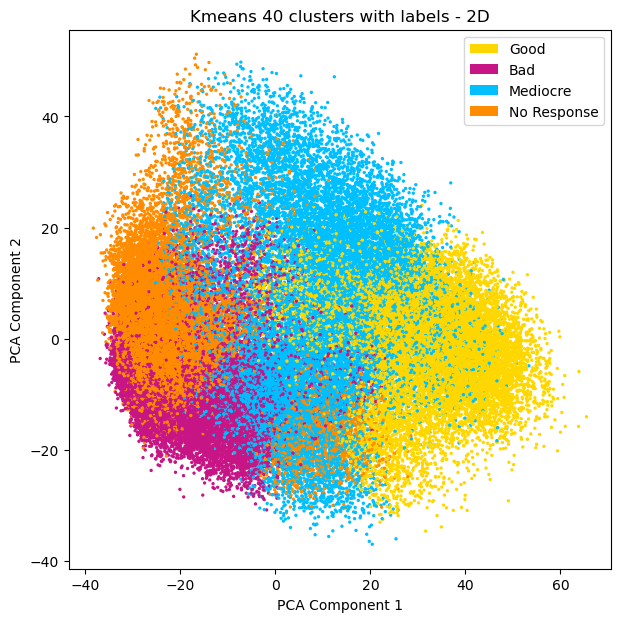

/scratch/tmp/24524573.1.default.q/ipykernel_5666/1892731100.py:60: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist=11


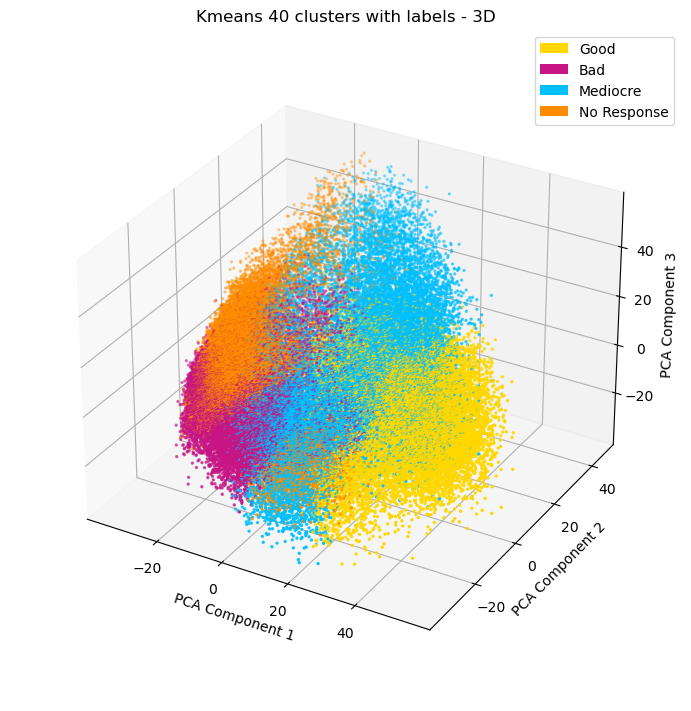

In [5]:
vgg19_kmeans40_ratings = {0:'mediocre',1:'bad',2:'no_response',3:'mediocre',4:'good',5:'mediocre',6:'no_response',7:'good',
                          8:'mediocre',9:'mediocre',10:'good',11:'good',12:'bad',13:'good',14:'no_response',
                          15:'mediocre',16:'bad',17:'mediocre',18:'bad',19:'good',20:'mediocre',
                          21:'mediocre',22:'no_response',23:'mediocre',24:'bad',25:'bad',26:'mediocre',27:'good',
                          28:'no_response',29:'no_response',30:'mediocre',31:'no_response',32:'no_response',33:'good',
                          34:'mediocre',35:'no_response',36:'good',37:'mediocre',38:'mediocre',39:'bad'}

cluster_visualizations(n_clusters=40,ratings_dict=vgg19_kmeans40_ratings, 
                       clusters_csv_filepath='../model/vgg19_kmeans40.csv', 
                       pca_features_filepath='../model/vgg19_pca_features.csv', 
                       figure_filepath='../model')


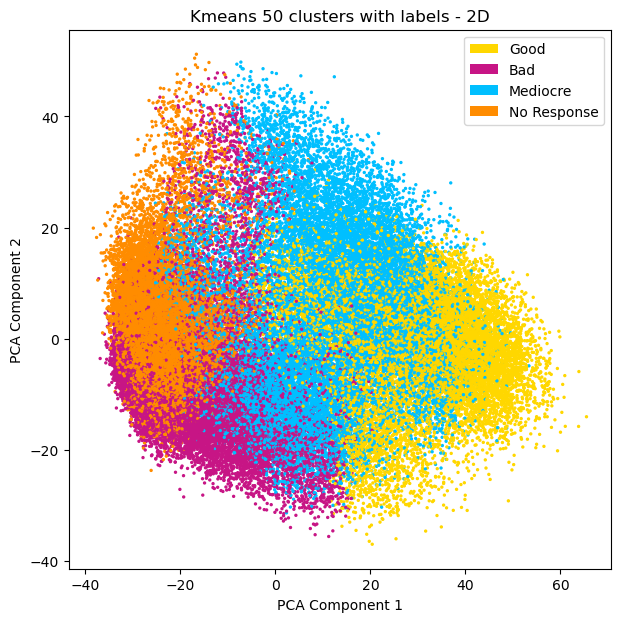

/scratch/tmp/24524573.1.default.q/ipykernel_5666/1892731100.py:60: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist=11


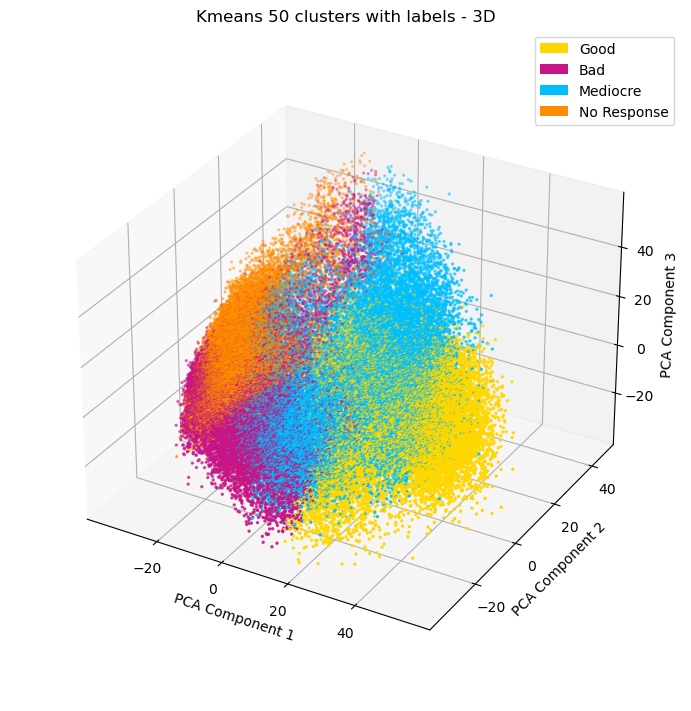

In [6]:
vgg19_kmeans50_ratings = {0:'mediocre',1:'bad',2:'no_response',3:'mediocre',4:'good',5:'mediocre',6:'no_response',7:'good',
                          8:'mediocre',9:'mediocre',10:'good',11:'good',12:'bad',13:'good',14:'no_response',
                          15:'mediocre',16:'bad',17:'mediocre',18:'bad',19:'good',20:'mediocre',
                          21:'mediocre',22:'mediocre',23:'mediocre',24:'bad',25:'bad',26:'bad',27:'good',
                          28:'no_response',29:'bad',30:'mediocre',31:'no_response',32:'no_response',33:'good',
                          34:'mediocre',35:'mediocre',36:'good',37:'mediocre',38:'mediocre',39:'good',
                          40:'no_response',41:'no_response',42:'mediocre',43:'mediocre',44:'no_response',45:'mediocre',
                          46:'bad',47:'bad',48:'good',49:'good'}

cluster_visualizations(n_clusters=50, ratings_dict=vgg19_kmeans50_ratings, 
                       clusters_csv_filepath='../model/vgg19_kmeans50.csv', 
                       pca_features_filepath='../model/vgg19_pca_features.csv', 
                       figure_filepath='../model')
